## Import

In [6]:
import pandas as pd
import numpy as np

from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import mutual_info_classif, f_classif
from scipy.stats import chi2_contingency
from pandas.api.types import is_numeric_dtype, is_categorical_dtype
from scipy.stats import pearsonr

### Data Load

In [7]:
train = pd.read_csv('./train.csv')
test = pd.read_csv('./test.csv')

## Train Info

In [3]:
train.head()

,ID,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result,Cancer
0,TRAIN_00000,80,M,CHN,ASN,Positive,Exposed,Sufficient,Non-Smoker,Not Obese,No,0.650355,2.784735,6.744603,2.575820,1
1,TRAIN_00001,37,M,NGA,ASN,Positive,Unexposed,Sufficient,Smoker,Obese,No,2.950430,0.911624,7.303305,2.505317,1
2,TRAIN_00002,71,M,CHN,MDE,Positive,Unexposed,Sufficient,Non-Smoker,Not Obese,Yes,2.200023,0.717754,11.137459,2.381080,0
3,TRAIN_00003,40,F,IND,HSP,Negative,Unexposed,Sufficient,Non-Smoker,Obese,No,3.370796,6.846380,10.175254,0.753023,0
4,TRAIN_00004,53,F,CHN,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,4.230048,0.439519,7.194450,0.569356,1


In [4]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(train):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(train[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(train[train[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(train[train[item].isnull() == True])/len(train[item])*100,2))
    
for item in dataFeatures:
    minValue.append(train[item].min())

for item in dataFeatures:
    maxValue.append(train[item].max())

for item in dataFeatures:
    unique.append(train[item].nunique())

for item in dataFeatures:
    uniqueSample.append(train[item].unique()[0:2])

train_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})
train_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,87159,TRAIN_00000,TRAIN_87158,"[TRAIN_00000, TRAIN_00001]"
1,Age,int64,0,0.0,75,14,88,"[80, 37]"
2,Gender,object,0,0.0,2,F,M,"[M, F]"
3,Country,object,0,0.0,10,BRA,USA,"[CHN, NGA]"
4,Race,object,0,0.0,5,AFR,MDE,"[ASN, MDE]"
5,Family_Background,object,0,0.0,2,Negative,Positive,"[Positive, Negative]"
6,Radiation_History,object,0,0.0,2,Exposed,Unexposed,"[Exposed, Unexposed]"
7,Iodine_Deficiency,object,0,0.0,2,Deficient,Sufficient,"[Sufficient, Deficient]"
8,Smoke,object,0,0.0,2,Non-Smoker,Smoker,"[Non-Smoker, Smoker]"
9,Weight_Risk,object,0,0.0,2,Not Obese,Obese,"[Not Obese, Obese]"


## Test Info

In [5]:
test.head()

,ID,Age,Gender,Country,Race,Family_Background,Radiation_History,Iodine_Deficiency,Smoke,Weight_Risk,Diabetes,Nodule_Size,TSH_Result,T4_Result,T3_Result
0,TEST_00000,53,M,NGA,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,2.940678,6.434501,9.227958,2.733846
1,TEST_00001,46,M,KOR,MDE,Negative,Unexposed,Deficient,Smoker,Obese,No,3.450129,4.729535,5.937664,0.775012
2,TEST_00002,78,F,IND,ASN,Negative,Exposed,Sufficient,Non-Smoker,Obese,No,4.680720,5.663475,10.455964,1.259896
3,TEST_00003,69,F,KOR,CAU,Negative,Unexposed,Sufficient,Non-Smoker,Not Obese,No,4.280588,7.473752,8.785335,2.826138
4,TEST_00004,77,F,KOR,CAU,Positive,Unexposed,Sufficient,Non-Smoker,Obese,No,3.380094,7.099987,8.737063,3.453563


In [6]:
# show dataframe for each features that we have
dataFeatures = []
dataType     = []
null         = []
nullPCT      = []
unique       = []
minValue     = []
maxValue     = []
uniqueSample = []


for item in list(test):
    dataFeatures.append(item)

for item in dataFeatures:
    dataType.append(test[item].dtype.name)
    
for item in dataFeatures:
    null.append(len(test[test[item].isnull() == True]))

for item in dataFeatures:
    nullPCT.append(round(len(test[test[item].isnull() == True])/len(test[item])*100,2))
    
for item in dataFeatures:
    minValue.append(test[item].min())

for item in dataFeatures:
    maxValue.append(test[item].max())

for item in dataFeatures:
    unique.append(test[item].nunique())

for item in dataFeatures:
    uniqueSample.append(test[item].unique()[0:2])

test_info = pd.DataFrame({
    'dataFeatures' : dataFeatures,
    'dataType' : dataType,
    'null' : null,
    'nullPCT':nullPCT,
    'unique' : unique,
    'minValue' : minValue,
    'maxValue' : maxValue,
    'uniqueSample':uniqueSample
})

test_info

,dataFeatures,dataType,null,nullPCT,unique,minValue,maxValue,uniqueSample
0,ID,object,0,0.0,46204,TEST_00000,TEST_46203,"[TEST_00000, TEST_00001]"
1,Age,int64,0,0.0,75,14,88,"[53, 46]"
2,Gender,object,0,0.0,2,F,M,"[M, F]"
3,Country,object,0,0.0,10,BRA,USA,"[NGA, KOR]"
4,Race,object,0,0.0,5,AFR,MDE,"[CAU, MDE]"
5,Family_Background,object,0,0.0,2,Negative,Positive,"[Negative, Positive]"
6,Radiation_History,object,0,0.0,2,Exposed,Unexposed,"[Unexposed, Exposed]"
7,Iodine_Deficiency,object,0,0.0,2,Deficient,Sufficient,"[Sufficient, Deficient]"
8,Smoke,object,0,0.0,2,Non-Smoker,Smoker,"[Non-Smoker, Smoker]"
9,Weight_Risk,object,0,0.0,2,Not Obese,Obese,"[Not Obese, Obese]"


## Original Feature 분석

In [7]:
print(train.shape)
print(test.shape)

(87159, 16)
(46204, 15)


## Data Processing

#### Column 정의

In [3]:
categorical_features = list(train.select_dtypes("object").columns)
numerical_features = list(train.select_dtypes(["float", "int"]).drop(columns="Cancer").columns)
test_features = [i for i in test.columns]

In [4]:
X = train.drop(columns=['ID', 'Cancer'])
y = train['Cancer']

x_test = test.drop('ID', axis=1)

Feature 확인

In [32]:
train['low_TSH'] = (train['TSH_Result'] < 0.5).astype(int)
print(train['low_TSH'].value_counts())
pd.crosstab(train['low_TSH'], train['Cancer'], normalize='index')

low_TSH
0    83687
1     3472
Name: count, dtype: int64


Cancer,0,1
low_TSH,,
0,0.880388,0.119612
1,0.870680,0.129320


In [51]:
T3_value = 2
T4_value = 11

train['Is_Hot_Nodule'] = (
    (train['TSH_Result'] < 0.4) & 
    (train['T3_Result'] > T3_value) & (train['T4_Result'] > T4_value)
).astype(int)

print(train['Is_Hot_Nodule'].value_counts())
pd.crosstab(train['Is_Hot_Nodule'], train['Cancer'], normalize='index')

Is_Hot_Nodule
0    86999
1      160
Name: count, dtype: int64


Cancer,0,1
Is_Hot_Nodule,,
0,0.879976,0.120024
1,0.893750,0.106250


In [21]:
pd.crosstab(train['Radiation_History'], train['Cancer'], normalize='index')

Cancer,0,1
Radiation_History,,
Exposed,0.820213,0.179787
Unexposed,0.889916,0.110084


In [25]:
train['child'] = (train['Age'] < 25).astype(int)
print(train['child'].value_counts())
pd.crosstab(train['child'], train['Cancer'], normalize='index')

child
0    74331
1    12828
Name: count, dtype: int64


Cancer,0,1
child,,
0,0.879458,0.120542
1,0.883146,0.116854


In [30]:
train['Rad_Child'] = (
    (train['Radiation_History'] == 'Exposed') & 
    (train['Age'] < 25)
).astype(int)

print(train['Rad_Child'].value_counts())
pd.crosstab(train['Rad_Child'], train['Cancer'], normalize='index')
#의미 있어보인다

Rad_Child
0    85338
1     1821
Name: count, dtype: int64


Cancer,0,1
Rad_Child,,
0,0.881366,0.118634
1,0.816035,0.183965


#### Outlier 확인

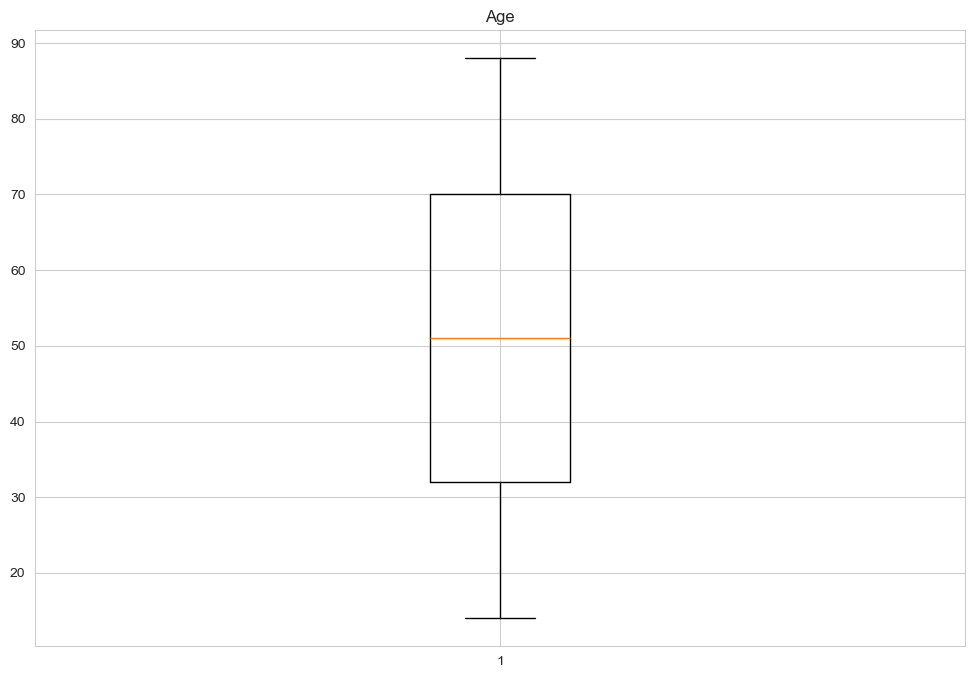

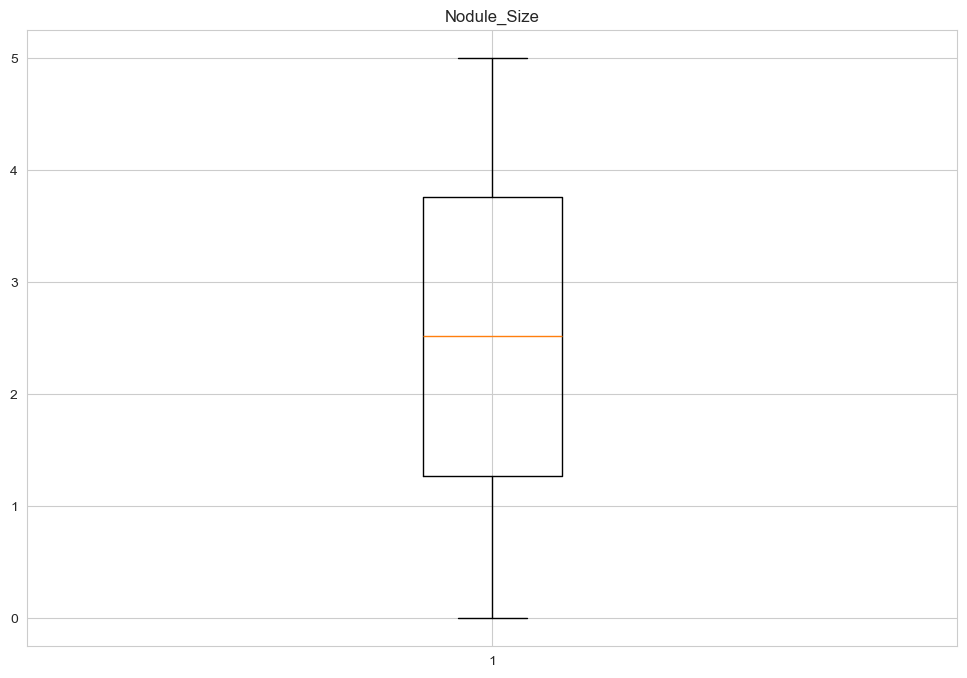

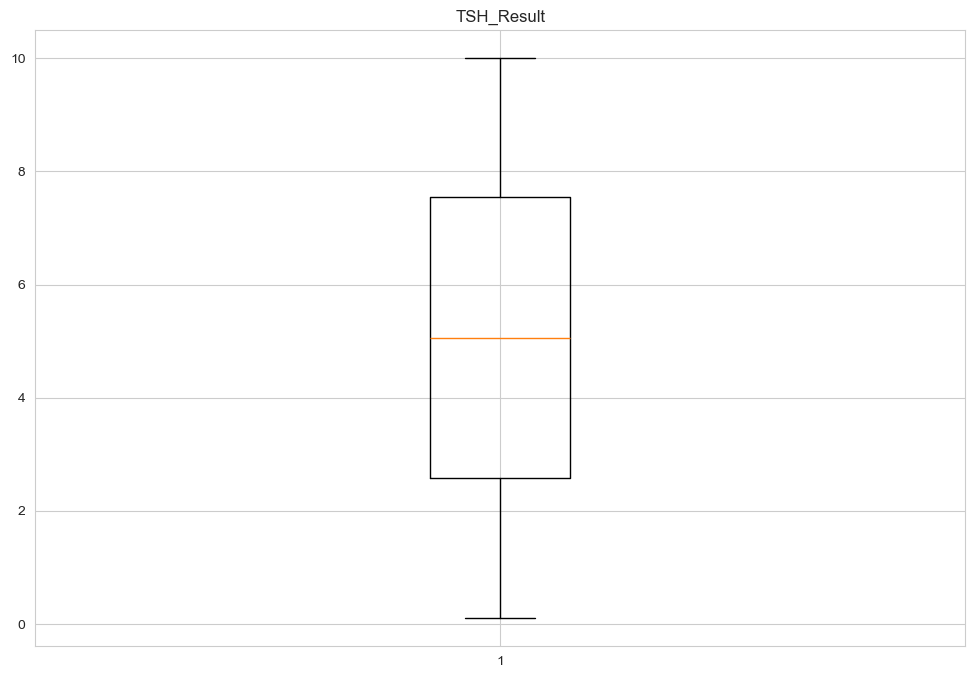

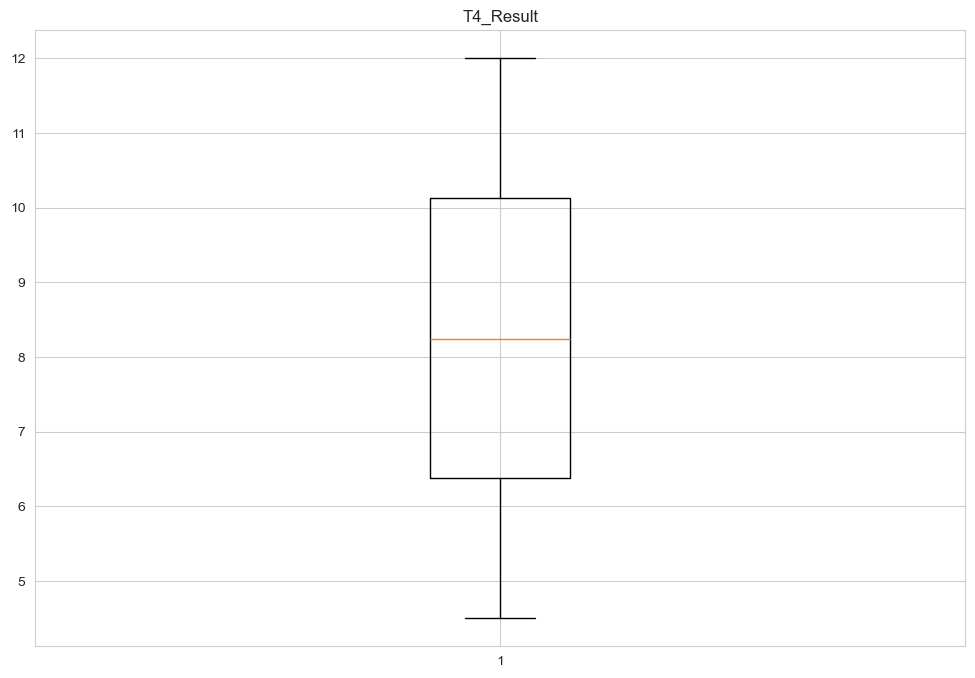

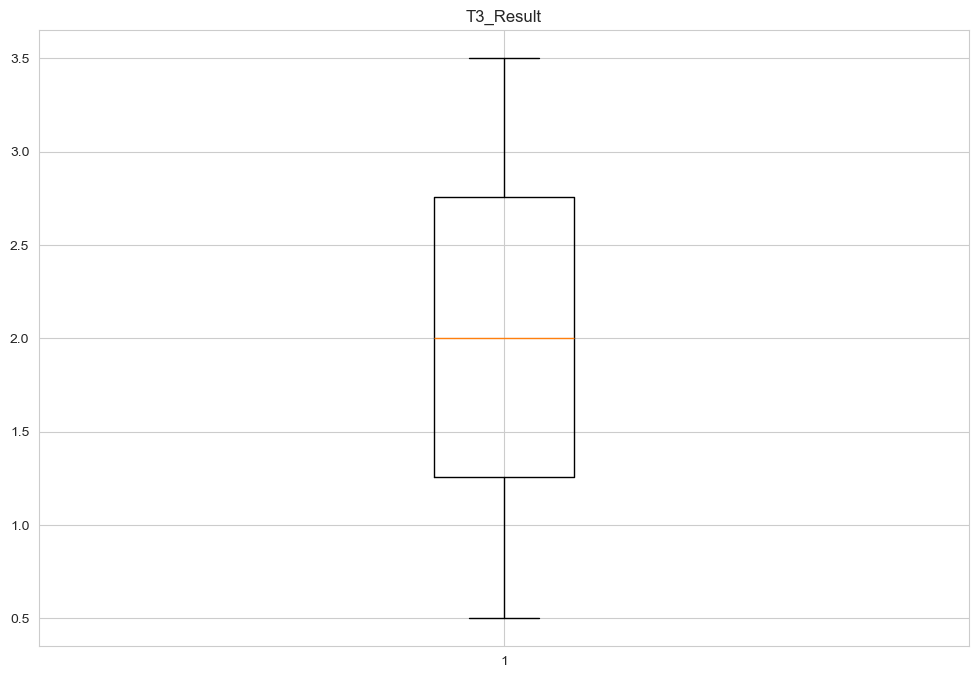

In [10]:
for col in numerical_features :
    plt.figure(figsize=(12, 8))
    plt.boxplot(train[col], sym='r*')
    plt.title(col)
    plt.show()

In [11]:
train['Cancer'].value_counts().to_frame('count').assign(ratio=lambda x: x['count'] / x['count'].sum())

,count,ratio
Cancer,,
0,76700,0.880001
1,10459,0.119999


## Data 시각화

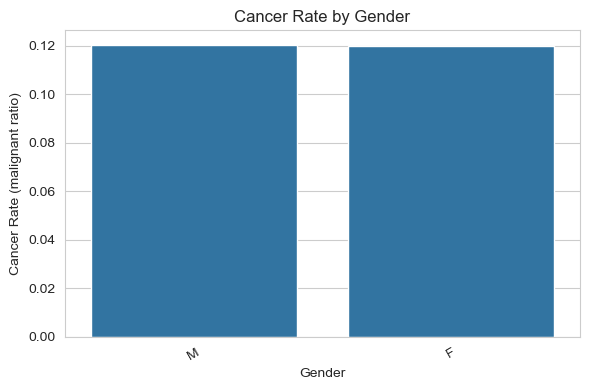

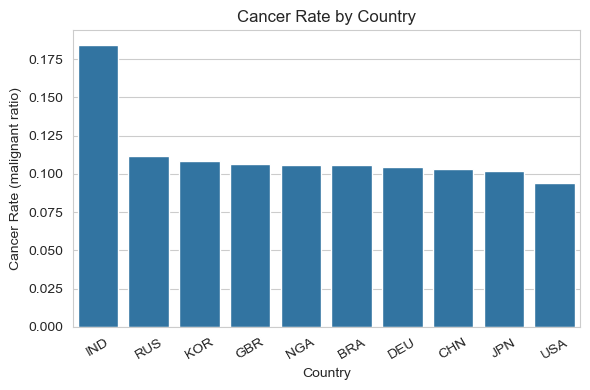

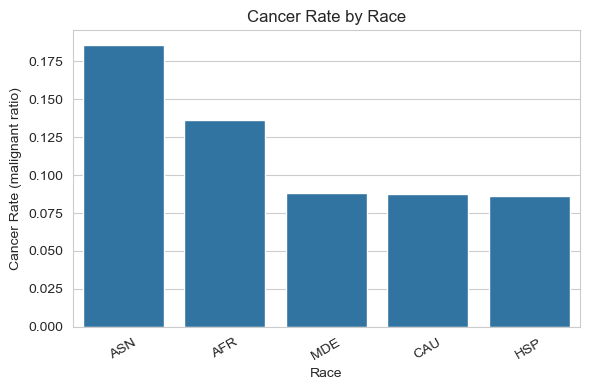

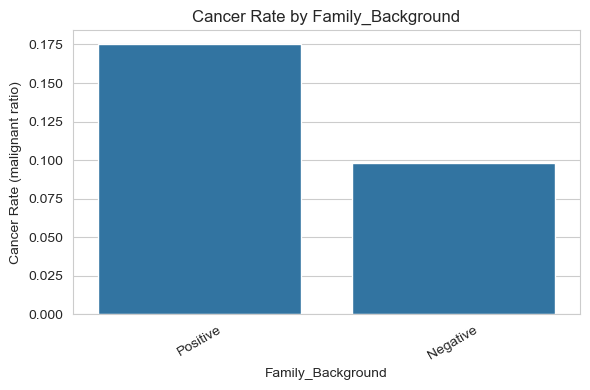

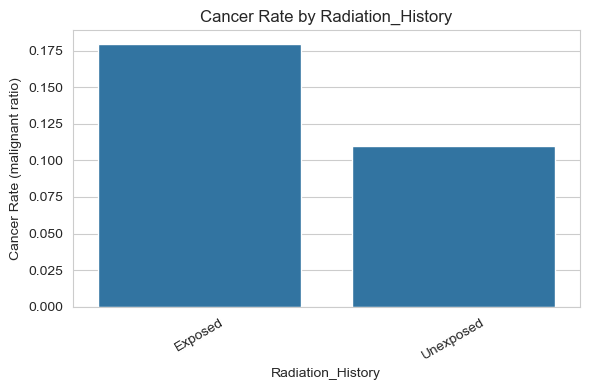

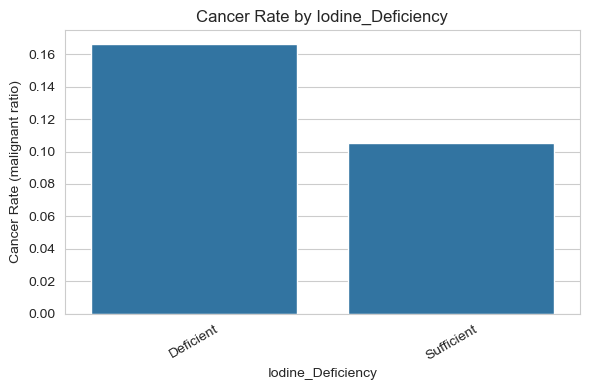

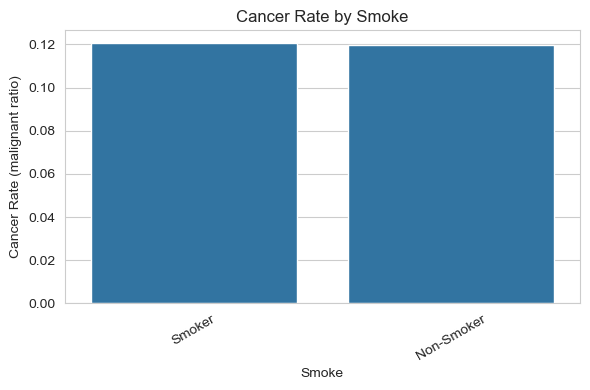

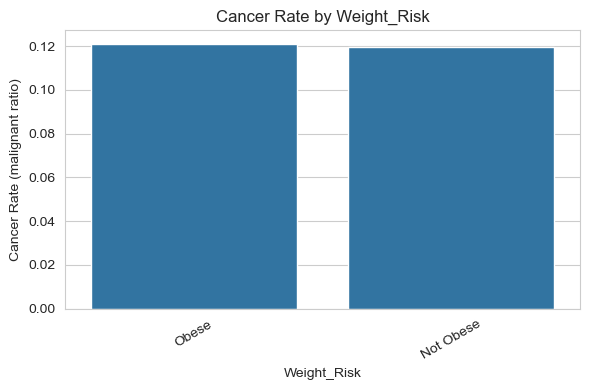

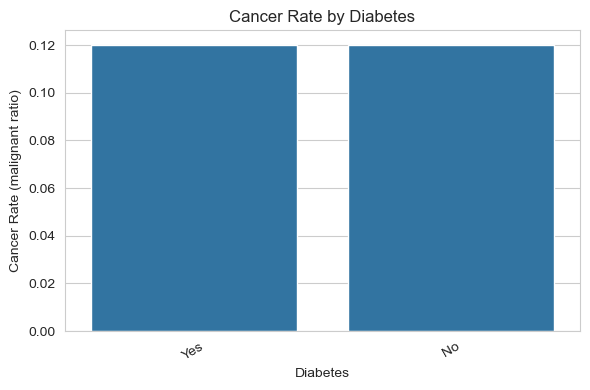


📋 Cancer Rate Summary by 'Gender':

 - Gender = M: Cancer Rate = 0.1202
 - Gender = F: Cancer Rate = 0.1198

📋 Cancer Rate Summary by 'Country':

 - Country = IND: Cancer Rate = 0.1845
 - Country = RUS: Cancer Rate = 0.1120
 - Country = KOR: Cancer Rate = 0.1084
 - Country = GBR: Cancer Rate = 0.1064
 - Country = NGA: Cancer Rate = 0.1061
 - Country = BRA: Cancer Rate = 0.1056
 - Country = DEU: Cancer Rate = 0.1045
 - Country = CHN: Cancer Rate = 0.1032
 - Country = JPN: Cancer Rate = 0.1018
 - Country = USA: Cancer Rate = 0.0939

📋 Cancer Rate Summary by 'Race':

 - Race = ASN: Cancer Rate = 0.1860
 - Race = AFR: Cancer Rate = 0.1362
 - Race = MDE: Cancer Rate = 0.0879
 - Race = CAU: Cancer Rate = 0.0878
 - Race = HSP: Cancer Rate = 0.0860

📋 Cancer Rate Summary by 'Family_Background':

 - Family_Background = Positive: Cancer Rate = 0.1753
 - Family_Background = Negative: Cancer Rate = 0.0981

📋 Cancer Rate Summary by 'Radiation_History':

 - Radiation_History = Exposed: Cancer Rate 

In [22]:
# 📦 텍스트 요약 저장용 리스트
summary_text = []

for col in categorical_features:
    if train[col].nunique() > 30:
        continue  # 너무 많은 범주는 생략
    
    plt.figure(figsize=(6, 4))
    
    # 각 범주별 Cancer=1 비율 계산
    cancer_rate = train.groupby(col)['Cancer'].mean().sort_values(ascending=False)
    
    # 그래프 그리기
    sns.barplot(x=cancer_rate.index.astype(str), y=cancer_rate.values)
    plt.title(f'Cancer Rate by {col}')
    plt.ylabel('Cancer Rate (malignant ratio)')
    plt.xticks(rotation=30)
    plt.tight_layout()
    plt.show()
    
    # 텍스트 요약 준비
    summary = [f"\n📋 Cancer Rate Summary by '{col}':\n"]
    for category, rate in cancer_rate.items():
        summary.append(f" - {col} = {category}: Cancer Rate = {rate:.4f}")
    summary_text.append("\n".join(summary))

# ✅ 최종 텍스트 요약 한번에 출력
print("\n".join(summary_text))

C:\Users\dongbin\AppData\Local\Temp\ipykernel_17384\1532565254.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate = train.groupby('bin')['Cancer'].mean()


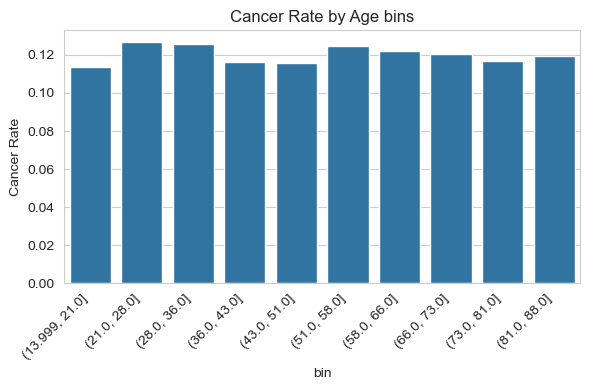

C:\Users\dongbin\AppData\Local\Temp\ipykernel_17384\1532565254.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate = train.groupby('bin')['Cancer'].mean()


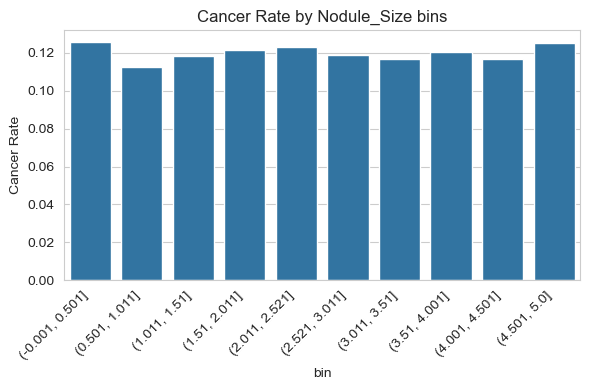

C:\Users\dongbin\AppData\Local\Temp\ipykernel_17384\1532565254.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate = train.groupby('bin')['Cancer'].mean()


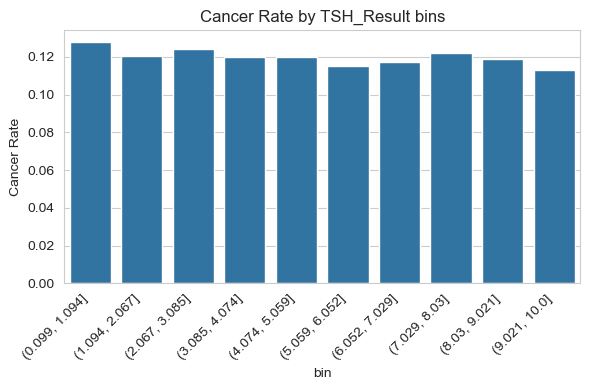

C:\Users\dongbin\AppData\Local\Temp\ipykernel_17384\1532565254.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate = train.groupby('bin')['Cancer'].mean()


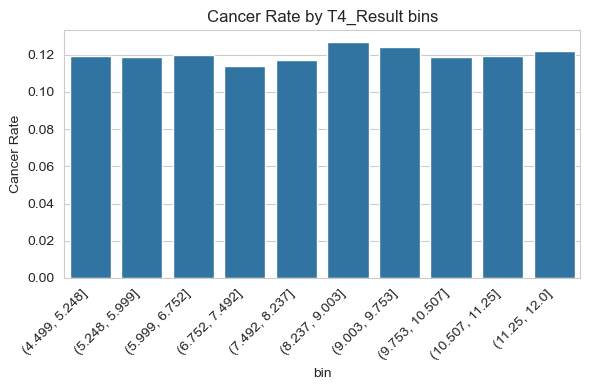

C:\Users\dongbin\AppData\Local\Temp\ipykernel_17384\1532565254.py:12: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  cancer_rate = train.groupby('bin')['Cancer'].mean()


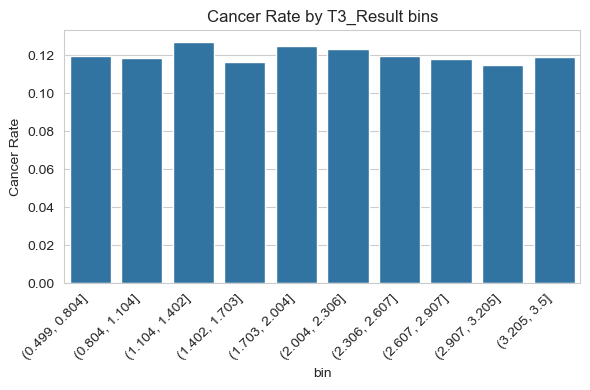

In [19]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

for col in numerical_features:
    plt.figure(figsize=(6, 4))
    
    # 수치형 변수를 10개 구간으로 나누기 (quantile binning)
    train['bin'] = pd.qcut(train[col], q=10, duplicates='drop')  # 구간 겹칠 경우 자동 제거
    
    # 각 구간별 Cancer=1 비율 계산
    cancer_rate = train.groupby('bin')['Cancer'].mean()
    
    # 막대그래프
    sns.barplot(x=cancer_rate.index.astype(str), y=cancer_rate.values)
    
    plt.title(f'Cancer Rate by {col} bins')
    plt.ylabel('Cancer Rate')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()


In [21]:

results = []

for col in numerical_features:
    valid_data = train[[col, 'Cancer']].dropna()
    r, p = pearsonr(valid_data[col], valid_data['Cancer'])
    results.append({
        'Feature': col,
        'Correlation': r,
        'P-value': p
    })

# 정렬 및 출력
corr_df = pd.DataFrame(results).sort_values(by='Correlation', key=abs, ascending=False)
corr_df.reset_index(drop=True, inplace=True)

# 보기 좋게 출력
print(corr_df.to_string(index=False, float_format="%.4f"))

    Feature  Correlation  P-value
 TSH_Result      -0.0082   0.0152
  T3_Result      -0.0035   0.2969
  T4_Result       0.0033   0.3295
Nodule_Size       0.0011   0.7512
        Age      -0.0009   0.7969


## profiling report

In [13]:
"""
profile = ProfileReport(X, title="Pandas Profiling Report", explorative=True)
profile.to_notebook_iframe()  # Jupyter에서 보기
profile.to_file("report.html")  # HTML 저장
"""

'\nprofile = ProfileReport(X, title="Pandas Profiling Report", explorative=True)\nprofile.to_notebook_iframe()  # Jupyter에서 보기\nprofile.to_file("report.html")  # HTML 저장\n'

In [14]:
print(y.value_counts())

Cancer
0    76700
1    10459
Name: count, dtype: int64


In [15]:
def cramers_v(confusion_matrix):
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    r, k = confusion_matrix.shape
    return np.sqrt(chi2 / (n * (min(k - 1, r - 1))))

def feature_target_relationship(X, y, max_cat_unique=30):
    results = []

    for col in X.columns:
        x = X[col]
        if x.isnull().all():
            continue
        if is_numeric_dtype(x):
            try:
                mi = mutual_info_classif(X[[col]].fillna(0), y, discrete_features=False)[0]
                f_val, p_val = f_classif(X[[col]].fillna(0), y)
                results.append({
                    "Feature": col,
                    "Type": "Numeric",
                    "Mutual Info": mi,
                    "F-statistic": f_val[0],
                    "p-value": p_val[0],
                    "Cramér’s V": np.nan,
                    "Chi² p-value": np.nan
                })
            except Exception as e:
                print(f"[Numeric Error] {col}: {e}")

        elif isinstance(x.dtype, pd.api.types.CategoricalDtype) or x.nunique() <= max_cat_unique:
            try:
                # 치환: 결측이나 문자 처리
                x_cat = x.fillna("Missing").astype(str)
                confusion = pd.crosstab(x_cat, y)
                cramer_v = cramers_v(confusion)
                chi2_stat, chi2_p, _, _ = chi2_contingency(confusion)

                # mutual_info에 넣기 위해 정수 인코딩
                x_encoded = x_cat.astype("category").cat.codes
                mi = mutual_info_classif(x_encoded.values.reshape(-1, 1), y, discrete_features=True)[0]

                results.append({
                    "Feature": col,
                    "Type": "Categorical",
                    "Mutual Info": mi,
                    "F-statistic": np.nan,
                    "p-value": np.nan,
                    "Cramér’s V": cramer_v,
                    "Chi² p-value": chi2_p
                })
            except Exception as e:
                print(f"[Categorical Error] {col}: {e}")

    df_result = pd.DataFrame(results)
    df_result = df_result.sort_values(by="Mutual Info", ascending=False)

    return df_result

In [16]:
feature_target_relationship(X, y)

,Feature,Type,Mutual Info,F-statistic,p-value,Cramér’s V,Chi² p-value
3,Race,Categorical,7.595886e-03,NaN,NaN,0.126023,1.807341e-298
4,Family_Background,Categorical,5.394012e-03,NaN,NaN,0.107144,1.345248e-219
2,Country,Categorical,4.188804e-03,NaN,NaN,0.095906,9.248838e-167
6,Iodine_Deficiency,Categorical,2.996242e-03,NaN,NaN,0.079895,5.213516e-123
5,Radiation_History,Categorical,2.539535e-03,NaN,NaN,0.074874,2.847981e-108
10,Nodule_Size,Numeric,2.144718e-03,0.100524,0.751202,NaN,NaN
0,Age,Numeric,7.445640e-04,0.066239,0.796894,NaN,NaN
12,T4_Result,Numeric,5.680503e-04,0.950885,0.329497,NaN,NaN
8,Weight_Risk,Categorical,2.581134e-06,NaN,NaN,0.002235,5.093083e-01
7,Smoke,Categorical,2.273523e-07,NaN,NaN,0.000630,8.523813e-01
